# Exploratory Data Analysis

In [1]:
import sys

sys.path.append("..")

In [2]:
from src.dataset import ImageDataset, CLASSES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
labels_df = pd.read_csv("../data/processed/labels.csv")
print(labels_df.shape)
labels_df.head()

(2999, 7)


,filename,chandler,joey,monica,phoebe,rachel,ross
0,0_8wewPn7TZfs_0.jpg,0.0,0.0,0.0,0.0,1.0,0.0
1,0_8wewPn7TZfs_1.jpg,0.0,1.0,0.0,0.0,0.0,0.0
2,0_8wewPn7TZfs_2.jpg,0.0,1.0,0.0,0.0,0.0,0.0
3,0_8wewPn7TZfs_3.jpg,0.0,0.0,0.0,0.0,1.0,1.0
4,0_8wewPn7TZfs_4.jpg,0.0,0.0,1.0,0.0,1.0,1.0


In [4]:
plt.style.use("fivethirtyeight")

## Representation of each class in the dataset

Here we look at how the classes are represented in the dataset

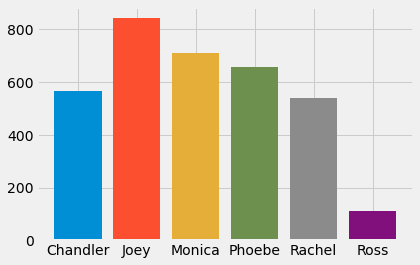

In [5]:
classes = ["chandler", "joey", "monica", "phoebe", "rachel", "ross"]

class_and_counts = []
for classname in classes:
    plt.bar(classname.title(), labels_df[classname].sum())

## Images with no classes

Some of the images in the dataset does not contain any discernible faces and such images will contain no labels - let us see how many such images are present in our dataset

<BarContainer object of 2 artists>

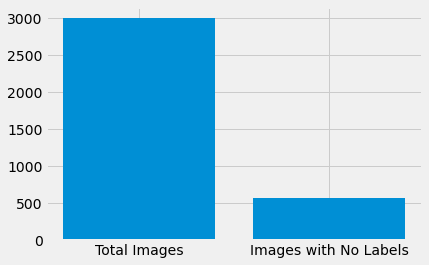

In [6]:
rows_with_no_class = labels_df[(labels_df[classes] == 0).all(axis=1)]
plt.bar(["Total Images", "Images with No Labels"], [len(labels_df), len(rows_with_no_class)])

### Example

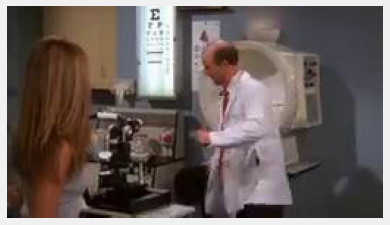

In [7]:
idx = np.random.randint(0, len(rows_with_no_class))
plt.axis('off')
plt.imshow(mpimg.imread("../data/raw_images/"+rows_with_no_class.iloc[idx].filename))

In [8]:
mpimg.imread("../data/raw_images/"+rows_with_no_class.iloc[idx].filename).shape

(144, 256, 3)

## Distribution of classes in dataset

We see that there are no images with 5 or more characters present together

<AxesSubplot:ylabel='Count'>

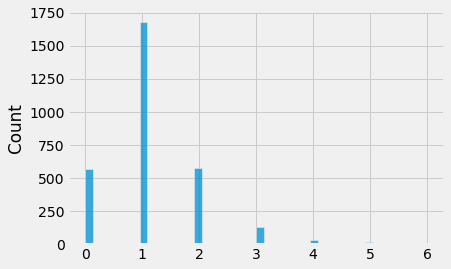

In [9]:
sns.histplot(labels_df[classes].apply(np.sum, axis=1))

## Train-Test Split

In [10]:
BATCH_SIZE = 1
train_data = ImageDataset(train=True)
test_data = ImageDataset(train=False)

Number of training images: 2065
Number of test images: 365


<BarContainer object of 2 artists>

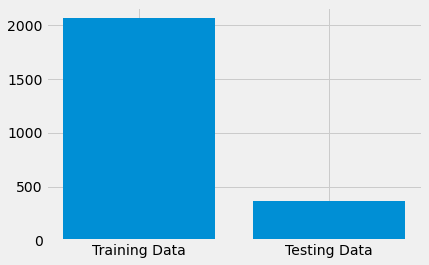

In [11]:
plt.bar(["Training Data", "Testing Data"], [len(train_data), len(test_data)])